# Mini Project

## Movies database

### Pablo Jiménez

First, we import the **libraries** and load the **datasets**

In [1]:
import pandas as pd
import numpy as np
import os.path


MOVIELENS="C:/Users/pablo/Documents/EdX/P4DS/Week-4-Pandas/Week-4-Pandas/movies"

movies = pd.read_csv(os.path.join(MOVIELENS, 'movies.csv'), sep=',')
ratings = pd.read_csv(os.path.join(MOVIELENS, 'ratings.csv'), sep=',')
tags = pd.read_csv(os.path.join(MOVIELENS, 'tags.csv'), sep=',')

Now, let's take a first look in the datasets of interest

In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


We merge both DataFrames

In [2]:
Movies = movies.merge(ratings, on='movieId', how='inner')
Movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


We now need to **clean** the data to keep only the information **relevant** to our analysis.
We will focus on the year and the rating, so we delete the rest

In [3]:
del Movies['timestamp']
del Movies['userId']
del Movies['genres']

Below, we create a column that contains only the release date and convert it to numeric so we can operate with it.

In [4]:
Movies['year'] = Movies['title'].str.extract('.*\((.*)\).*', expand=True)
Movies['year'] = pd.to_numeric(Movies['year'], errors = 'coerce')


In [58]:
Movies.head()

,movieId,title,rating,year
0,1,Toy Story (1995),4.0,1995.0
1,1,Toy Story (1995),5.0,1995.0
2,1,Toy Story (1995),4.0,1995.0
3,1,Toy Story (1995),4.0,1995.0
4,1,Toy Story (1995),4.5,1995.0


# Data analysis
We now proceed to the data analysis. In order to know the total amount of ratings reported each year, we create a new object and rename the columns for clarification.

In [7]:
ratings_by_year = Movies[['rating', 'year']].groupby('year', as_index = False).count()

ratings_by_year.tail()

,year,rating
113,2011.0,121609
114,2012.0,96149
115,2013.0,68542
116,2014.0,41353
117,2015.0,996


In [8]:
movies_avg = Movies[['year', 'rating']].groupby('year', as_index = False).mean()

movies_avg.head()

,year,rating
0,1891.0,3.000000
1,1893.0,3.375000
2,1894.0,3.071429
3,1895.0,2.833333
4,1896.0,3.282609


#### Let's merge this two DF

In [9]:
movies_ratings = ratings_by_year.merge(movies_avg, on = 'year', how = 'inner')
movies_ratings.head()

,year,rating_x,rating_y
0,1891.0,1,3.000000
1,1893.0,4,3.375000
2,1894.0,14,3.071429
3,1895.0,3,2.833333
4,1896.0,23,3.282609


We change the name of the columns for clarification

In [10]:
movies_ratings.columns = ['Year', 'Number_of_ratings', 'Ratings_mean']
movies_ratings.head()

,Year,Number_of_ratings,Ratings_mean
0,1891.0,1,3.000000
1,1893.0,4,3.375000
2,1894.0,14,3.071429
3,1895.0,3,2.833333
4,1896.0,23,3.282609


We use a filter to gather **reliable** information; this is, we will use only those movies which have been rated more than **100,000** times.

As we can appreciate below, 40 years have passed the filter in an interval that goes from 1968 to 2011. 

In [11]:
rat_filter = movies_ratings.Number_of_ratings > 100000
movies_ratings = movies_ratings[rat_filter]
movies_ratings.head()

,Year,Number_of_ratings,Ratings_mean
70,1968.0,102365,3.740141
73,1971.0,126032,3.760775
75,1973.0,108497,3.760316
76,1974.0,101840,3.893721
77,1975.0,145945,3.881493


### Assessing relationships among variables
Evaluating correlations we can see several things:
1. Years are:
    1. Moderately and positively correlated to the number of ratings.
    2. Negatively correlated to the ratings mean.
2. The total number of ratings shows and inverse correlation with the ratings mean.

In [11]:
movies_ratings.corr()

,Year,Number_of_ratings,Ratings_mean
Year,1.000000,0.377864,-0.623011
Number_of_ratings,0.377864,1.000000,-0.635534
Ratings_mean,-0.623011,-0.635534,1.000000


### Visualizing results
To help the understanding of these values, we can create a few plots

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

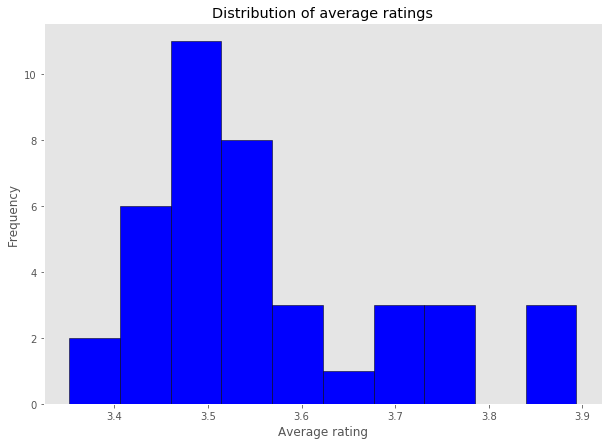

In [111]:
movies_ratings.Ratings_mean.plot(kind='hist',color='blue',edgecolor='black',figsize=(10,7))

plt.title('Distribution of average ratings')
plt.xlabel('Average rating')
plt.grid()

Text(0, 0.5, 'Average rating')

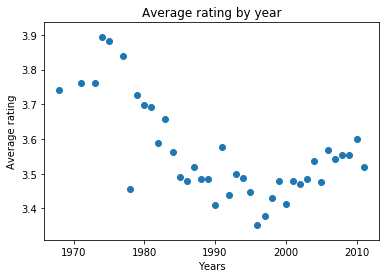

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(movies_ratings['Year'],
            movies_ratings['Ratings_mean'])
plt.title('Average rating by year')
plt.xlabel('Years')
plt.ylabel('Average rating')

Text(0, 0.5, 'Average rating')

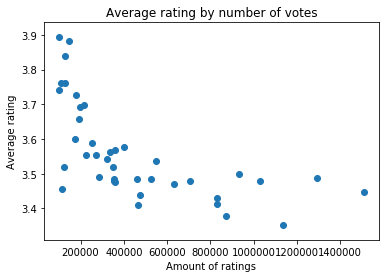

In [22]:
plt.scatter(movies_ratings['Number_of_ratings'],
            movies_ratings['Ratings_mean'])
plt.title('Average rating by number of votes')
plt.xlabel('Amount of ratings')
plt.ylabel('Average rating')

Text(0, 0.5, 'Amount of ratings')

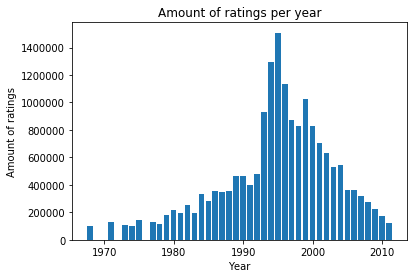

In [24]:
plt.bar(movies_ratings['Year'],
        movies_ratings['Number_of_ratings'])

plt.title('Amount of ratings per year')
plt.xlabel('Year')
plt.ylabel('Amount of ratings')

# Executing Linear Regression

From the plots and correlations above, we can tell relations between years, number of ratings and average rating exist.
We can start by performing a simple linear regression. Briefly, linear regression model tries to predict values of a dependent variable, Y (the average rating, in this case), from an independent variable X (years).

### Simple linear regression:

In [14]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

X = movies_ratings['Year'].values.reshape(-1, 1)
Y = movies_ratings['Ratings_mean'].values.reshape(-1, 1)

reg = lr.fit(X, Y)
Rating_pred = lr.predict(X)

Text(0, 0.5, 'Average rating')

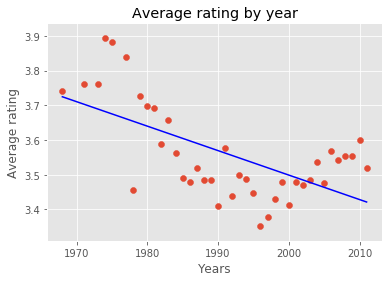

In [16]:
plt.scatter(X, Y)
plt.plot(X, Rating_pred, color = 'blue')
plt.title('Average rating by year')
plt.xlabel('Years')
plt.ylabel('Average rating')

### Results:

In [110]:
print('Intercept =',reg.intercept_,
      '\nCoefficient = ', reg.coef_,
      '\nR square =', reg.score(X, Y))

Intercept = [17.60260675] 
Coefficient =  [[-0.00705187]] 
R square = 0.3881428531247264


Coefficient value means that, for each year you move along, regression forecasts a drop of 0.7% in the average rating.

R square is the proportion of variability in the data that has been explained with the regression model

### Multiple linear regression:

It seems reasonable, nevertheless, that both the releasing year and the number of rates may be affecting the average ratings at the same time. To see whether this is true, we can perform a multiple linear regression:

In [87]:
X = sm.add_constant(movies_ratings[['Year', 'Number_of_ratings']], prepend = False)
Y = movies_ratings['Ratings_mean']

reg = sm.OLS(Y, X).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:           Ratings_mean   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     25.02
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.34e-07
Time:                        21:00:26   Log-Likelihood:                 40.486
No. Observations:                  40   AIC:                            -74.97
Df Residuals:                      37   BIC:                            -69.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                 -0.0051      0.00

C:\Users\pablo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Results:

We can see that both predictors are significant and meaningful to explain the change in average rate. Also, R square is now 0.575, which means that the variability of data is better explained in this second model. We can now add two new columns to our dataset: one for predictions and a second one for errors, or deviation from the real value.


In [105]:
B0 = 13.7084
B1 = -.0051
B2 = -1.802 * (10**-7)

In [104]:
movies_ratings['Prediction'] = Pred = B0 + B1*movies_ratings['Year'] + B2*movies_ratings['Number_of_ratings']
movies_ratings['Error'] = movies_ratings['Prediction'] - movies_ratings['Ratings_mean']
movies_ratings.head(15)

,Year,Number_of_ratings,Ratings_mean,Prediction,Error
70,1968.0,102365,3.740141,3.653154,-0.086987
73,1971.0,126032,3.760775,3.633589,-0.127186
75,1973.0,108497,3.760316,3.626549,-0.133767
76,1974.0,101840,3.893721,3.622648,-0.271072
77,1975.0,145945,3.881493,3.609601,-0.271892
79,1977.0,126532,3.839989,3.602899,-0.237090
80,1978.0,114130,3.457058,3.600034,0.142976
81,1979.0,179622,3.726239,3.583132,-0.143107
82,1980.0,216220,3.697121,3.571437,-0.125684
83,1981.0,197820,3.691715,3.569653,-0.122062


To address the issue of multicollinearity, we perform a linear regression between both independent variables and calculate de **VIF** (Variance Inflation Factor)

In [114]:
X = sm.add_constant(movies_ratings[['Number_of_ratings']], prepend = False)
Y = movies_ratings['Year']

reg = sm.OLS(Y, X).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     6.329
Date:                Sun, 03 Nov 2019   Prob (F-statistic):             0.0162
Time:                        23:40:50   Log-Likelihood:                -152.79
No. Observations:                  40   AIC:                             309.6
Df Residuals:                      38   BIC:                             313.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Number_of_ratings  1.289e-05   5.12e-0

In [115]:
1/(1-0.143)

1.1668611435239207